### 词云

In [ ]:
import jieba
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
from PIL import Image
% matplotlib inline

In [3]:
text = open("G:/workspace/导师活儿/xiechen_spyder/data/北宫.txt", "r").read()

In [10]:
wordlist_after_jieba = jieba.cut(text, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

In [11]:
font = 'C:\Windows\Fonts\simfang.ttf'
my_wordcloud = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2).generate(wl_space_split)

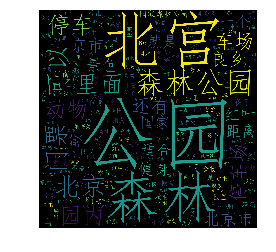

In [12]:
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [14]:
my_wordcloud.to_file('C:/Users/Administrator/Desktop/show_Chinese.png')

In [18]:
# 加载停用词
stopword_list = [line.strip() for line in open("G:/workspace/导师活儿/xiechen_spyder/stopword_chinese.txt").readlines() ]

In [36]:
new_text = [word for word in wl_space_split.split(" ") if word not in stopword_list and "一" not in word]
new_string = ' '.join(new_text)

In [48]:
# alice_coloring = np.array(Image.open("G:/workspace/导师活儿/xiechen_spyder/tree.jpg"))
my_wordcloud = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2,
                        random_state=42, background_color="white").generate(new_string)

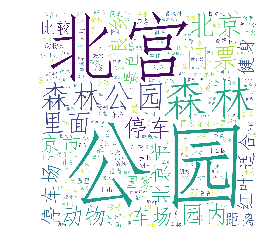

In [49]:
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

In [50]:
my_wordcloud.to_file('C:/Users/Administrator/Desktop/show_Chinese.png')

In [53]:
my_wordcloud = WordCloud(collocations=False, font_path=font, width=1400, height=1400, margin=2,
                        random_state=42, background_color="white", stopwords=stopword_list).generate(wl_space_split)

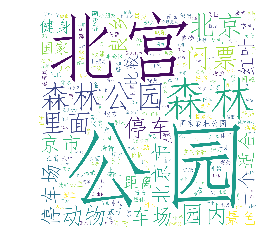

In [54]:
plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
my_wordcloud.to_file('C:/Users/Administrator/Desktop/show_Chinese1.png')

In [1]:
import pandas as pd
import numpy as np

In [57]:
df =  pd.read_excel("D:/BaiduNetdiskDownload/house_price/beijing.xlsx", encoding="utf-8")
df.head()

,rooms,halls,size,unit_price,price
0,2,1,50.26,33824,170
1,1,1,53.82,44593,240
2,2,1,61.01,54089,330
3,2,1,52.03,49971,260
4,2,1,46.60,107296,500


In [60]:
df.corr()

,rooms,halls,size,unit_price,price
rooms,1.000000,0.514599,0.623657,0.011929,0.580416
halls,0.514599,1.000000,0.598940,0.076106,0.578038
size,0.623657,0.598940,1.000000,-0.013638,0.853435
unit_price,0.011929,0.076106,-0.013638,1.000000,0.420970
price,0.580416,0.578038,0.853435,0.420970,1.000000


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
train_x, text_x, train_y, test_y = train_test_split(df.iloc[:, :-1], df["price"])
model = LinearRegression()
model.fit(train_x, train_y)
model.score(text_x, test_y), model.score(train_x, train_y)

(0.9056945845677713, 0.9230443587617401)

### pyecharts测试

In [2]:
import pandas as pd
import numpy as np
from pyecharts import Bar
from pyecharts import configure
# configure(output_image='svg')

In [3]:
df = pd.read_excel(r"C:/Users/HuZheHui/Desktop/new_house.xls", encoding="utf-8" )
df.head()

,size,floor,subway_distance,attention,visit,rooms,decorate,school_or_business,price
0,66.45,28,1097.000000,2,10,3,0,0,385
1,56.70,6,429.000000,5,11,4,1,1,530
2,57.47,6,978.000000,9,13,4,1,0,410
3,61.26,17,687.444488,5,10,3,0,0,285
4,141.37,17,1409.000000,4,12,6,0,0,485


In [33]:
from pyecharts import Scatter
import re
from pyecharts import Polar
def price_translate(x):
    l_level = int(x/200)
    return "[{}, {})".format(l_level*2, l_level*2+2)
df["price_level"] = df["price"].apply(price_translate)
price_level_se = df.groupby(by="price_level")["price"].count()

new_index = [int(re.findall("\[(\d+),", index)[0]) for index in price_level_se.index]
bar_y = pd.Series(list(price_level_se), index = new_index).sort_index()
bar_x = ["[{}-{})".format(i, i+2) for i in bar_y.index]
bar = Bar("房价分布图")
bar.add("房子数量", bar_x, list(bar_y),mark_point=["max", "min"], xaxis_interval=2, xaxis_name="价格区间（百万）")
bar.render(path=r"C:/Users/HuZheHui/Desktop/price_dis.png")

phantomjs version: 2.1.1

Generating file ...
File saved in C:/Users/HuZheHui/Desktop/price_dis.png


In [4]:
from pyecharts import Boxplot
boxplot = Boxplot("房价箱形图")
x_axis = ["price", ]
y_axis = [list(df["price"])]
boxplot.add("房价(万元)", x_axis, boxplot.prepare_data(y_axis))

In [39]:
df.head()

,size,floor,subway_distance,attention,visit,rooms,decorate,school_or_business,price,price_level
0,66.45,28,1097.000000,2,10,3,0,0,385,"[2, 4)"
1,56.70,6,429.000000,5,11,4,1,1,530,"[4, 6)"
2,57.47,6,978.000000,9,13,4,1,0,410,"[4, 6)"
3,61.26,17,687.444488,5,10,3,0,0,285,"[2, 4)"
4,141.37,17,1409.000000,4,12,6,0,0,485,"[4, 6)"


In [57]:
place = df.groupby(by="school_or_business")["price"].median()
decorate = df.groupby(by="decorate")["price"].median()
p_d_df = pd.DataFrame({"p":place, "d":decorate})
p_d_df

,p,d
0,426,384.5
1,710,605.0


In [67]:
bar = Bar("地段和装修情况对房价的影响", width=500)
x_bar = ["是否为学区房或在商业圈", "是否精装修"]
bar.add("是", x_bar, list(p_d_df.iloc[1, :]), legend_pos="right")
bar.add("否", x_bar, list(p_d_df.iloc[0, :]), legend_pos="right")
bar.render(path=r"C:/Users/HuZheHui/Desktop/place_de.png")

phantomjs version: 2.1.1

Generating file ...
File saved in C:/Users/HuZheHui/Desktop/place_de.png


In [72]:
from pyecharts import Scatter
scatter = Scatter("距离地铁距离与房屋面积对房价的影响")
scatter.add("scatter",
    list(df["subway_distance"]),
    list(df["size"]),
    extra_data=list(df["price"]))

In [81]:
df["floor"].unique()

array([28,  6, 17, 15, 25,  7, 21, 18, 20, 14, 16, 10,  5, 24, 13, 11, 30,
       33,  9, 27, 19, 22, 23, 12, 29, 26,  4, 32, 31,  8,  2,  3, 35, 34,
       36, 38, 42, 80, 39,  1, 37], dtype=int64)

### SAS作业

In [53]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("D:/code_file/workspace/class_work/zhaixiang_project/house.csv", encoding="utf-8")
df2 = pd.read_csv("D:/code_file/workspace/class_work/zhaixiang_project/house1.csv", encoding="utf-8")
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df

,room,hall,bathroom,size,floor,subway_distance,attention,visit,unit_price,price
0,1.0,1.0,1.0,66.45,28,1097.0,2,10,57938,385
1,2.0,1.0,1.0,56.70,6,429.0,5,11,93474,530
2,2.0,1.0,1.0,57.47,6,978.0,9,13,71342,410
3,1.0,1.0,1.0,61.26,17,NaN,5,10,46523,285
4,3.0,1.0,2.0,141.37,17,1409.0,4,12,34307,485
5,2.0,1.0,1.0,80.84,15,1255.0,9,7,49357,399
6,1.0,1.0,1.0,45.77,25,414.0,4,12,89578,410
7,2.0,1.0,1.0,59.60,6,528.0,7,11,119966,715
8,2.0,1.0,1.0,66.82,7,748.0,6,15,52828,353
9,1.0,1.0,1.0,55.08,21,346.0,1,10,77705,428


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
room               12000 non-null float64
hall               12000 non-null float64
bathroom           12000 non-null float64
size               12000 non-null float64
floor              12000 non-null int64
subway_distance    12000 non-null float64
attention          12000 non-null int64
visit              12000 non-null int64
unit_price         12000 non-null int64
price              12000 non-null int64
dtypes: float64(5), int64(5)
memory usage: 937.6 KB


In [59]:
df.fillna({"subway_distance":df["subway_distance"].mean(), "room":df["room"].median(),
          "hall":df["hall"].median(), "bathroom":df["bathroom"].median(),}, inplace=True)

In [65]:
df.corr()

,room,hall,bathroom,size,floor,subway_distance,attention,visit,unit_price,price
room,1.000000,0.489967,0.566386,0.707865,-0.075843,0.012043,-0.074083,-0.019170,-0.053763,0.514570
hall,0.489967,1.000000,0.681481,0.663258,0.069083,0.030638,-0.107251,-0.061562,-0.117391,0.441534
bathroom,0.566386,0.681481,1.000000,0.753453,0.064306,0.024187,-0.093247,-0.074513,-0.073380,0.534537
size,0.707865,0.663258,0.753453,1.000000,0.152964,0.028132,-0.146872,-0.091059,-0.164538,0.678361
floor,-0.075843,0.069083,0.064306,0.152964,1.000000,-0.096868,-0.071013,-0.026842,0.017467,0.160625
subway_distance,0.012043,0.030638,0.024187,0.028132,-0.096868,1.000000,-0.028074,-0.037424,-0.128803,-0.061779
attention,-0.074083,-0.107251,-0.093247,-0.146872,-0.071013,-0.028074,1.000000,0.110090,-0.033628,-0.126351
visit,-0.019170,-0.061562,-0.074513,-0.091059,-0.026842,-0.037424,0.110090,1.000000,-0.013113,-0.089099
unit_price,-0.053763,-0.117391,-0.073380,-0.164538,0.017467,-0.128803,-0.033628,-0.013113,1.000000,0.538331
price,0.514570,0.441534,0.534537,0.678361,0.160625,-0.061779,-0.126351,-0.089099,0.538331,1.000000


In [93]:
df["rooms"] = df["room"] + df["hall"] + df["bathroom"]
df = df[["room", "hall", "bathroom", "size", "floor", "subway_distance", "attention", "visit", "unit_price", "rooms", "price"]]
df.head()

,room,hall,bathroom,size,floor,subway_distance,attention,visit,unit_price,rooms,price
0,1.0,1.0,1.0,66.45,28,1097.000000,2,10,57938,3.0,385
1,2.0,1.0,1.0,56.70,6,429.000000,5,11,93474,4.0,530
2,2.0,1.0,1.0,57.47,6,978.000000,9,13,71342,4.0,410
3,1.0,1.0,1.0,61.26,17,687.444488,5,10,46523,3.0,285
4,3.0,1.0,2.0,141.37,17,1409.000000,4,12,34307,6.0,485


In [143]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_stan = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_stan, np.log(df["price"]), test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test), model.coef_

(0.8253976609500417,
 array([0.21120419, 0.27518839, 0.05878587, 0.06859482, 0.15222821]))

In [142]:
x = np.vstack((np.array(decorate), df["size"].values, df["floor"].values, df["rooms"].values, np.array(school))).T
x

array([[ 0.  , 66.45, 28.  ,  3.  ,  0.  ],
       [ 1.  , 56.7 ,  6.  ,  4.  ,  1.  ],
       [ 1.  , 57.47,  6.  ,  4.  ,  0.  ],
       ...,
       [ 1.  , 86.74, 15.  ,  5.  ,  0.  ],
       [ 1.  , 57.7 ,  6.  ,  4.  ,  0.  ],
       [ 1.  , 42.56,  6.  ,  3.  ,  0.  ]])

In [124]:
decorate = [int(i)-10 for i in np.log(df["unit_price"])]


In [144]:
school = [1 if i >0.5 else 0 for i in MinMaxScaler().fit_transform(df.loc[:, ["unit_price"]])]
df["school"] = school

In [145]:
df.to_excel(r"C:\Users\HuZheHui\Desktop\new_house.xls", index=False, encoding="utf-8")

In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel(r"C:\Users\HuZheHui\Desktop\new_house.xls", encoding="utf-8").head(1000)
df.head(10)

,size,floor,subway_distance,attention,visit,rooms,decorate,school_or_business,price
0,66.45,28,1097.000000,2,10,3,0,0,385
1,56.70,6,429.000000,5,11,4,1,1,530
2,57.47,6,978.000000,9,13,4,1,0,410
3,61.26,17,687.444488,5,10,3,0,0,285
4,141.37,17,1409.000000,4,12,6,0,0,485
5,80.84,15,1255.000000,9,7,4,0,0,399
6,45.77,25,414.000000,4,12,3,1,1,410
7,59.60,6,528.000000,7,11,4,1,1,715
8,66.82,7,748.000000,6,15,4,0,0,353
9,55.08,21,346.000000,1,10,3,1,0,428


In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_stan = StandardScaler().fit_transform(df.iloc[:, :-1])
x_train, x_test, y_train, y_test = train_test_split(x_stan, df["price"], test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test), model.coef_

(0.8028095748895795,
 array([257.59183605,  16.45709998,   0.36087095,   3.0614845 ,
         -6.5619073 ,  -2.64095513, 110.41726413, 116.73722406]))

### seaborn

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

C:\Users\HuZheHui\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


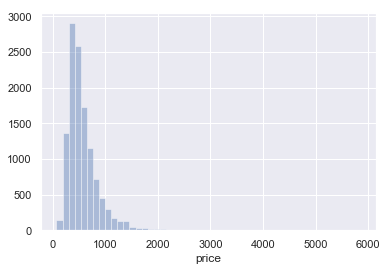

In [11]:
fig, ax = plt.subplots()
sns.distplot(df["price"], kde=False, ax=ax)

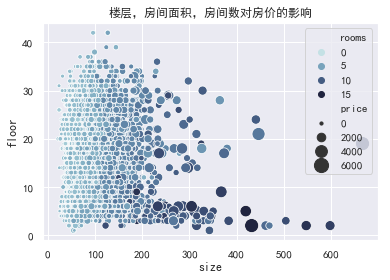

In [7]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name(), palette='husl')

fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="size", y="floor", hue="rooms", size="price",
                     palette=cmap, sizes=(10, 200), data=df, ax=ax)
ax.set(title="楼层，房间面积，房间数对房价的影响")
fig.savefig("C:/Users/HuZheHui/Desktop/1.svg", transparent=False, dip=100, bbox_inches="tight", format="svg")

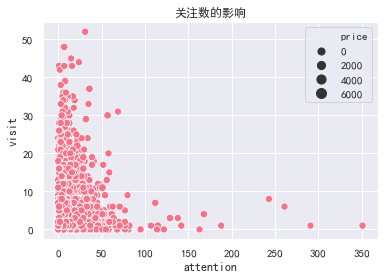

In [102]:
fig, ax = plt.subplots()
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="attention", y="visit", size="price",
                     sizes=(50, 100), data=df, ax=ax)
ax.set(title="关注数的影响")
fig.savefig("C:/Users/HuZheHui/Desktop/2.svg", transparent=False, dip=400, bbox_inches="tight", format="svg")